<a href="https://colab.research.google.com/github/maluvsb/DatasetESG/blob/main/esg_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import pandas as pd #importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [220]:
from google.colab import drive #importando o drive

In [221]:
drive.mount('/content/gdrive') #chamando o google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [222]:
from google.colab import files #comando para importar arquivos no colab
uploaded = files.upload() #comando para fazer o upload do arquivo

In [223]:
esg = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/esg.csv')

In [224]:
leitura = pd.read_csv('esg.csv') #realiza a leitura do arquivo importado

In [225]:
esg.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,433.000000,433.000000,433.000000,433.000000,433.000000
mean,21.422633,5.678984,6.673903,9.045035,1.896074
std,7.264458,5.339965,2.201049,3.813788,0.940748
min,7.000000,0.000000,3.000000,1.100000,0.000000
25%,16.000000,1.500000,5.000000,6.600000,1.000000
50%,21.000000,3.800000,6.000000,8.700000,2.000000
75%,26.000000,8.900000,7.700000,11.600000,2.000000
max,46.000000,25.000000,15.500000,21.000000,5.000000


In [226]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 501 non-null    object 
 3   Sector                  501 non-null    object 
 4   Industry                501 non-null    object 
 5   Full Time Employees     496 non-null    object 
 6   Description             501 non-null    object 
 7   Total ESG Risk score    433 non-null    float64
 8   Environment Risk Score  433 non-null    float64
 9   Governance Risk Score   433 non-null    float64
 10  Social Risk Score       433 non-null    float64
 11  Controversy Level       403 non-null    object 
 12  Controversy Score       433 non-null    float64
 13  ESG Risk Percentile     433 non-null    object 
 14  ESG Risk Level          376 non-null    ob

In [227]:
columns_to_drop = ['Symbol', 'Address', 'Description', 'Industry', 'ESG Risk Percentile']
columns_to_drop = [column.strip() for column in columns_to_drop if column.strip() in esg.columns]
esg.drop(columns_to_drop, axis=1, inplace=True)

In [228]:
esg.head()

,Name,Sector,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Level
0,Agilent Technologies Inc,Healthcare,"18,000",15.0,0.3,6.3,8.6,Low,1.0,Low
1,American Airlines Group Inc,Industrials,"132,500",29.0,12.0,5.0,12.0,Moderate,2.0,NaN
2,Advance Auto Parts Inc,Consumer Cyclical,"40,000",12.0,0.0,3.0,8.0,Moderate,2.0,Negligible
3,Apple Inc,Technology,"164,000",17.0,0.6,9.2,6.9,Significant,3.0,Low
4,Abbvie Inc,Healthcare,"50,000",28.0,1.1,9.9,16.8,Significant,3.0,Medium


In [229]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    503 non-null    object 
 1   Sector                  501 non-null    object 
 2   Full Time Employees     496 non-null    object 
 3   Total ESG Risk score    433 non-null    float64
 4   Environment Risk Score  433 non-null    float64
 5   Governance Risk Score   433 non-null    float64
 6   Social Risk Score       433 non-null    float64
 7   Controversy Level       403 non-null    object 
 8   Controversy Score       433 non-null    float64
 9   ESG Risk Level          376 non-null    object 
dtypes: float64(5), object(5)
memory usage: 39.4+ KB


In [230]:
# @title Ignora os valores vazios da tabela
df_sem_nan = esg.dropna()

In [231]:
# @title Empresas por setor
# Calcular o número de empresas por setor
setor = esg['Sector'].value_counts()

# Mostrar a contagem de empresas por setor
print("Contagem de empresas por setor:")
print(setor)

# Somar o número total de empresas
total_empresas = setor.sum()

# Mostrar o número total de empresas
print("\nTotal de empresas:", total_empresas)


Contagem de empresas por setor:
Sector
Technology                75
Industrials               70
Healthcare                67
Financial Services        67
Consumer Cyclical         58
Consumer Defensive        36
Real Estate               31
Utilities                 30
Communication Services    23
Basic Materials           22
Energy                    22
Name: count, dtype: int64

Total de empresas: 501


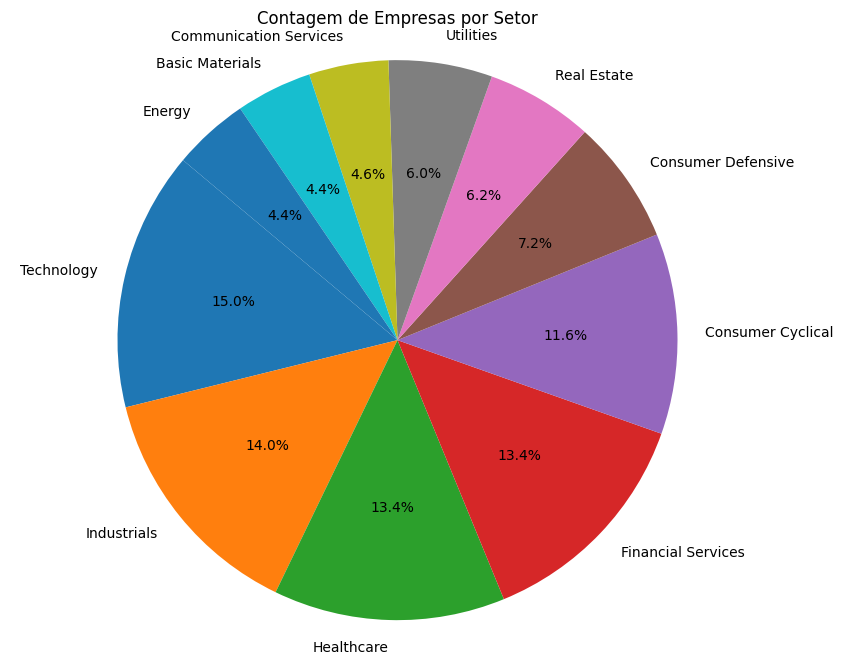

In [232]:
# @title Gráfico que identifica o setor da empresa
setor = esg['Sector'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(setor, labels=setor.index, autopct='%1.1f%%', startangle=140)

# Adicionando título
plt.title('Contagem de Empresas por Setor')

# Exibindo o gráfico
plt.axis('equal')  # Mantém a proporção de aspecto para que o gráfico pareça uma pizza
plt.show()


In [233]:
# @title Empresas por letra do alfabeto
# Calcular o número de empresas por letra do alfabeto no nome da companhia
contagem_por_letra = esg['Name'].str[0].str.upper().value_counts().sort_index()

# Mostrar a contagem de empresas por letra do alfabeto
print("Contagem de empresas por letra do alfabeto:")
print(contagem_por_letra)

# Somar o número total de empresas divididas por letra do alfabeto
total_empresas_por_letra = contagem_por_letra.sum()

# Mostrar o total de empresas divididas por letra do alfabeto
print("\nTotal de empresas:", total_empresas_por_letra)


Contagem de empresas por letra do alfabeto:
Name
3     1
A    56
B    24
C    55
D    22
E    28
F    21
G    14
H    21
I    19
J     7
K    10
L    15
M    35
N    20
O     9
P    29
Q     4
R    16
S    26
T    24
U     9
V    11
W    20
X     2
Y     1
Z     4
Name: count, dtype: int64

Total de empresas: 503


In [234]:
# @title Total ESG Risk Score
valores_unicos = esg['Total ESG Risk score'].unique()

# Imprimir os valores únicos
print("Valores únicos na coluna 'Total ESG Risk Score':", valores_unicos)

Valores únicos na coluna 'Total ESG Risk Score': [15. 29. 12. 17. 28. 25. 21. 10. 24. 36. 14. 16. 30. 26. 34. nan 19. 22.
 23. 11. 13. 39. 35. 18. 27. 32.  7.  9. 20. 46. 38. 31. 37. 33. 41. 42.
 43.]


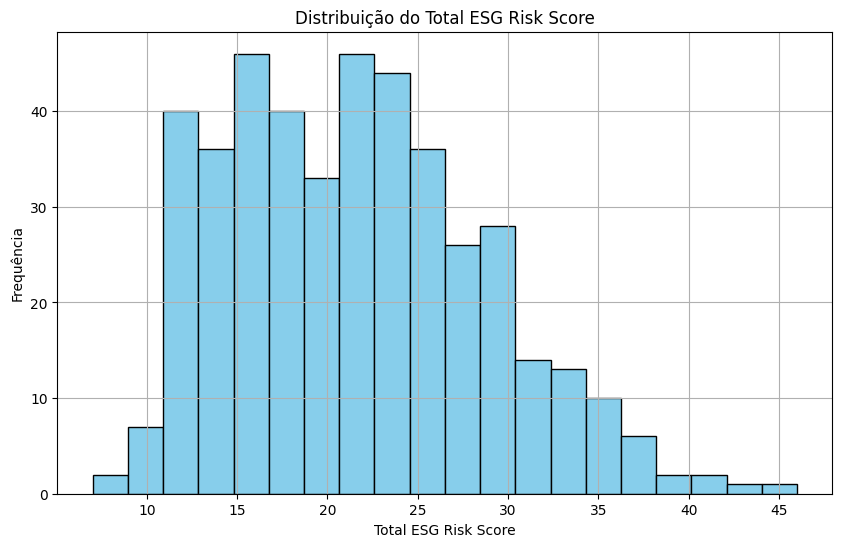

In [235]:
# @title Gráfico ESG Risk Score
total_esg_risk_scores = esg['Total ESG Risk score']

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(total_esg_risk_scores, bins=20, color='skyblue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição do Total ESG Risk Score')
plt.xlabel('Total ESG Risk Score')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.grid(True)
plt.show()

In [236]:
# Maior valor
maior_valor = max(total_esg_risk_scores)

# Menor valor
menor_valor = min(total_esg_risk_scores)

print("Maior valor encontrado na coluna 'Total ESG Risk score':", maior_valor)
print("Menor valor encontrado na coluna 'Total ESG Risk score':", menor_valor)

Maior valor encontrado na coluna 'Total ESG Risk score': 46.0
Menor valor encontrado na coluna 'Total ESG Risk score': 7.0


In [237]:
# @title Encontrando os valores de Controversy Level na tabela
controversy_levels = esg['Controversy Level'].unique()

print("Valores únicos na coluna 'Controversy Level':")
for value in controversy_levels:
    print(value)


Valores únicos na coluna 'Controversy Level':
Low
Moderate
Significant
nan
High
Severe


In [238]:
# @title Valores para cada classificação da coluna 'Controversy Level'
controversy_counts = esg['Controversy Level'].value_counts()

print("Contagem de valores para cada divisão na coluna 'Controversy Level':")
print(controversy_counts)

# Calcular a soma total dos campos da coluna 'Controversy Level'
soma_total = esg['Controversy Level'].count()

print("Soma total de todos os campos da coluna 'Controversy Level':", soma_total)


Contagem de valores para cada divisão na coluna 'Controversy Level':
Controversy Level
Moderate       197
Low            105
Significant     84
High            15
Severe           2
Name: count, dtype: int64
Soma total de todos os campos da coluna 'Controversy Level': 403


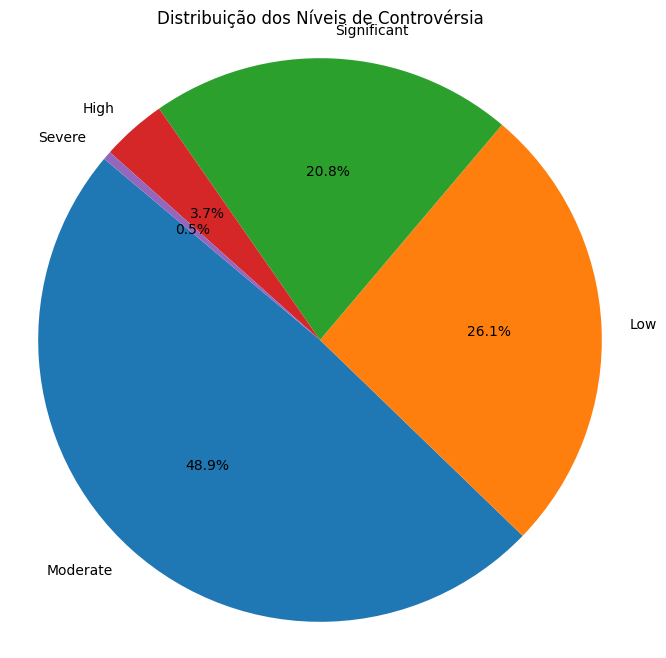

Valor 'None': 0 (0.00%)
Valor 'NaN': 100 (19.88%)


In [239]:
# @title Gráfico de acordo com o nível de Controvérsia
controversy_counts = esg['Controversy Level'].value_counts()

# Removendo os valores 'None'
controversy_counts = controversy_counts.drop(index=['None'], errors='ignore')
controversy_counts = controversy_counts.dropna()

# Obtendo as contagens de 'None' e 'NaN'
none_count = esg['Controversy Level'].eq('None').sum()
nan_count = esg['Controversy Level'].isna().sum()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(controversy_counts, labels=controversy_counts.index, autopct='%1.1f%%', startangle=140)

# Adicionando título
plt.title('Distribuição dos Níveis de Controvérsia')

# Exibindo o gráfico
plt.axis('equal')  # Mantém a proporção de aspecto para que o gráfico pareça uma pizza
plt.show()

# Exibir os valores 'None' e 'NaN' abaixo do gráfico
print(f"Valor 'None': {none_count} ({none_count / len(esg) * 100:.2f}%)")
print(f"Valor 'NaN': {nan_count} ({nan_count / len(esg) * 100:.2f}%)")

In [240]:
# @title Identificando os valores possíveis de 'Controvérsia'
valores_possiveis = esg['Controversy Score'].unique()

print("Valores possíveis na coluna 'Controversy Score':")
print(valores_possiveis)

valor_maximo = esg['Controversy Score'].max()
valor_minimo = esg['Controversy Score'].min()

print("Valor máximo na coluna 'Controversy Score':", valor_maximo)
print("Valor mínimo na coluna 'Controversy Score':", valor_minimo)

Valores possíveis na coluna 'Controversy Score':
[ 1.  2.  3.  0. nan  4.  5.]
Valor máximo na coluna 'Controversy Score': 5.0
Valor mínimo na coluna 'Controversy Score': 0.0


In [241]:
# @title Empresas por valores possíveis na tabela Controversy Score
# Valores possíveis na coluna 'Controversy Score'
valores_possiveis = [0.0, 1.0, 2.0, 3.0, 0.0, 4.0, 5.0]

# Contagem de empresas para cada valor possível
contagem_empresas_por_valor = {}

# Loop para contar o número de ocorrências de cada valor possível
for valor in valores_possiveis:
    if not pd.isnull(valor):  # Ignorar valores nulos
        contagem = esg[esg['Controversy Score'] == valor].shape[0]
        contagem_empresas_por_valor[valor] = contagem

# Imprimindo o número de empresas para cada valor possível
for valor, contagem in contagem_empresas_por_valor.items():
    print(f"Número de empresas com 'Controversy Score' igual a '{valor}': {contagem}")


Número de empresas com 'Controversy Score' igual a '0.0': 30
Número de empresas com 'Controversy Score' igual a '1.0': 105
Número de empresas com 'Controversy Score' igual a '2.0': 197
Número de empresas com 'Controversy Score' igual a '3.0': 84
Número de empresas com 'Controversy Score' igual a '4.0': 15
Número de empresas com 'Controversy Score' igual a '5.0': 2


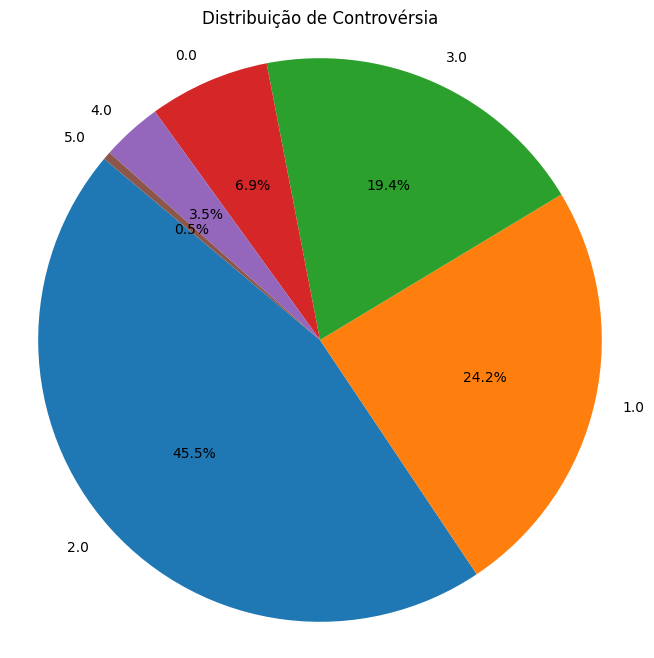

In [242]:
# @title Identificando os valores possíveis de 'Controvérsia' em gráfico

valores_possiveis = esg['Controversy Score'].unique()

# Contando o número de ocorrências de cada valor
contagem_valores = esg['Controversy Score'].value_counts()

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_valores, labels=contagem_valores.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribuição de Controvérsia")
plt.axis('equal')
plt.show()

In [243]:
# @title Identificando os valores possíveis da coluna 'Enviroment Risk Score'
valores_possiveis = esg['Environment Risk Score'].unique()

print("Valores possíveis na coluna 'Environment Risk Score':")
print(valores_possiveis)

valor_maximo = esg['Environment Risk Score'].max()
valor_minimo = esg['Environment Risk Score'].min()

print("Valor máximo na coluna 'Environment Risk Score':", valor_maximo)
print("Valor mínimo na coluna 'Environment Risk Score':", valor_minimo)

Valores possíveis na coluna 'Environment Risk Score':
[ 0.3 12.   0.   0.6  1.1  1.3  3.   1.   1.9 10.1 18.  14.1 13.  16.5
  2.   0.1  2.9 16.   nan  3.8  8.6  0.7  2.6  2.4  5.6  7.  22.   5.9
  8.   3.9 14.8  0.2  8.8 10.6  9.   7.1  1.6  2.8  2.2  3.7 15.3  1.5
  0.8  1.8 11.   7.2  1.7  2.7  5.2 10.   1.4 15.1 16.8  5.   6.   6.1
  6.3  4.6  2.1  5.5  5.8  9.8 17.3  7.3  4.5  2.3  5.4  7.4 24.1 18.6
 11.1 13.4  3.2  3.3  9.4  3.4  7.7  8.4 15.  14.5 20.7  7.5  6.9 20.4
 19.   3.5 16.3  4.   9.3 10.7 16.6  5.3  1.2  8.5 10.3  8.9  4.8 13.2
 11.3  0.5  8.1 10.4  4.4 14.3  4.3  4.9 14.   7.8  7.9  6.5 17.   4.2
  9.5 12.3  4.7 14.4 15.9 23.9  6.6  8.7 25.   9.2 11.6  2.5  3.6 19.7
 16.4 18.7  0.4 12.9 12.4 10.9 18.2 15.6  8.2]
Valor máximo na coluna 'Environment Risk Score': 25.0
Valor mínimo na coluna 'Environment Risk Score': 0.0


In [244]:
# @title Definindo Variáveis  para a coluna Envirnment Risk Score

# Valores possíveis na coluna 'Environment Risk Score'
valores_possiveis = [0.3, 12.0, 0.0, 0.6, 1.1, 1.3, 3.0, 1.0, 1.9, 10.1, 18.0, 14.1, 13.0, 16.5, 2.0, 0.1, 2.9, 16.0, 3.8, 8.6, 0.7, 2.6, 2.4, 5.6, 7.0, 22.0, 5.9, 8.0, 3.9, 14.8, 0.2, 8.8, 10.6, 9.0, 7.1, 1.6, 2.8, 2.2, 3.7, 15.3, 1.5, 0.8, 1.8, 11.0, 7.2, 1.7, 2.7, 5.2, 10.0, 1.4, 15.1, 16.8, 5.0, 6.0, 6.1, 6.3, 4.6, 2.1, 5.5, 5.8, 9.8, 17.3, 7.3, 4.5, 2.3, 5.4, 7.4, 24.1, 18.6, 11.1, 13.4, 3.2, 3.3, 9.4, 3.4, 7.7, 8.4, 15.0, 14.5, 20.7, 7.5, 6.9, 20.4, 19.0, 3.5, 16.3, 4.0, 9.3, 10.7, 16.6, 5.3, 1.2, 8.5, 10.3, 8.9, 4.8, 13.2, 11.3, 0.5, 8.1, 10.4, 4.4, 14.3, 4.3, 4.9, 14.0, 7.8, 7.9, 6.5, 17.0, 4.2, 9.5, 12.3, 4.7, 14.4, 15.9, 23.9, 6.6, 8.7, 25.0, 9.2, 11.6, 2.5, 3.6, 19.7, 16.4, 18.7, 0.4, 12.9, 12.4, 10.9, 18.2, 15.6, 8.2]

# Definir os intervalos
intervalos = [(0.0, 5.0), (5.0, 10.0), (10.0, 15.0), (15.0, 20.0), (20.0, 25.0)]

# Contagem de empresas em cada intervalo
contagens_empresas = [len([valor for valor in valores_possiveis if intervalo[0] <= valor < intervalo[1]]) for intervalo in intervalos]

# Imprimir o número de empresas em cada intervalo
for i, intervalo in enumerate(intervalos):
    print(f"Número de empresas com Environment Risk Score entre {intervalo[0]} e {intervalo[1]}: {contagens_empresas[i]}")


Número de empresas com Environment Risk Score entre 0.0 e 5.0: 47
Número de empresas com Environment Risk Score entre 5.0 e 10.0: 38
Número de empresas com Environment Risk Score entre 10.0 e 15.0: 24
Número de empresas com Environment Risk Score entre 15.0 e 20.0: 19
Número de empresas com Environment Risk Score entre 20.0 e 25.0: 5


In [245]:
# @title Identificando os valores possíveis da coluna 'Full Time Employees'
valores_possiveis = esg['Full Time Employees'].unique()

print("Valores possíveis na coluna 'Full Time Employees':")
print(valores_possiveis)


# Verificando o tipo de dados na coluna 'Full Time Employees'
print(esg['Full Time Employees'].dtype)

# Convertendo para tipo numérico se for do tipo string
if esg['Full Time Employees'].dtype == 'object':
    esg['Full Time Employees'] = esg['Full Time Employees'].str.replace(',', '').astype(float)

# Calculando o valor máximo e mínimo
valor_maximo = esg['Full Time Employees'].max()
valor_minimo = esg['Full Time Employees'].min()

print("Valor máximo na coluna 'Full Time Employees':", valor_maximo)
print("Valor mínimo na coluna 'Full Time Employees':", valor_minimo)


Valores possíveis na coluna 'Full Time Employees':
['18,000' '132,500' '40,000' '164,000' '50,000' '46,000' '115,000' '5,800'
 '732,000' '29,239' '24,450' '40,360' '63,000' '13,700' '9,244' '16,974'
 '9,100' '12,882' '26,200' '45,641' '9,800' '7,400' '22,910' '23,140'
 '54,000' '12,300' '33,000' '41,000' '25,000' '19,600' '25,200' '13,500'
 '6,391' '1,541,000' '3,612' '6,000' '12,000' '2,273' '19,710' '91,000'
 '160,000' '593' '4,791' '13,000' '2,859' '20,000' '2,900' '6,500' '2,821'
 '77,300' '69,440' '156,000' '216,000' '21,000' '60,000' '8,800' '52,200'
 '77,000' '9,300' nan '23,000' '8,725' '8,200' '53,200' '23,100' '57,000'
 '19,300' '34,300' '14,700' '383,000' '15,201' '45,000' '52,700' '780'
 '240,000' '18,600' '47,040' '52,000' '34,000' '1,543' '5,000' '87,000'
 '8,526' '10,200' '11,100' '13,263' '13,370' '2,700' '18,468' '5,250'
 '16,523' '101,700' '71,300' '5,148' '33,800' '8,700' '7,280' '186,000'
 '3,460' '104,958' '73,600' '8,560' '74,300' '8,986' '55,600' '14,000'
 '9,700

In [246]:
# @title Identificando os valores possíveis da coluna 'Governance Risk Score'
valores_possiveis = esg['Governance Risk Score'].unique()

print("Valores possíveis na coluna 'Governance Risk Score':")
print(valores_possiveis)

valor_maximo = esg['Governance Risk Score'].max()
valor_minimo = esg['Governance Risk Score'].min()

print("Valor máximo na coluna 'Governance Risk Score':", valor_maximo)
print("Valor mínimo na coluna 'Governance Risk Score':", valor_minimo)

Valores possíveis na coluna 'Governance Risk Score':
[ 6.3  5.   3.   9.2  9.9  5.2  8.4 12.   4.8  4.6  5.9  4.   5.5  6.5
 10.  14.  11.  10.5  6.7  8.   nan  6.   5.1  6.9  7.9 12.8  7.   3.6
  7.8  3.7  3.8 11.2  7.3  7.5  5.3  9.5  7.6  6.4 10.7 10.6 11.8  4.9
  8.5  4.7 11.4  5.7  5.6 13.   8.1  6.2  6.1  7.2  5.4  9.   4.5  3.4
  8.8 10.3  7.4  6.6  8.2  4.1  5.8  7.7  9.8  9.4  7.1  6.8 11.6 12.2
 10.2  9.6  8.6 11.7  3.5  3.3  3.2 11.5  8.7  9.7  9.3 10.9  4.3  8.9
  9.1 12.4  4.2 10.8 10.1 12.5 15.5  4.4]
Valor máximo na coluna 'Governance Risk Score': 15.5
Valor mínimo na coluna 'Governance Risk Score': 3.0


In [247]:
# @title Definindo Variáveis  para a coluna Governance Risk Score
# Valores possíveis na coluna 'Governance Risk Score'
valores_possiveis = [6.3, 5.0, 3.0, 9.2, 9.9, 5.2, 8.4, 12.0, 4.8, 4.6, 5.9, 4.0, 5.5, 6.5, 10.0, 14.0, 11.0, 10.5, 6.7, 8.0, None, 6.0, 5.1, 6.9, 7.9, 12.8, 7.0, 3.6, 7.8, 3.7, 3.8, 11.2, 7.3, 7.5, 5.3, 9.5, 7.6, 6.4, 10.7, 10.6, 11.8, 4.9, 8.5, 4.7, 11.4, 5.7, 5.6, 13.0, 8.1, 6.2, 6.1, 7.2, 5.4, 9.0, 4.5, 3.4, 8.8, 10.3, 7.4, 6.6, 8.2, 4.1, 5.8, 7.7, 9.8, 9.4, 7.1, 6.8, 11.6, 12.2, 10.2, 9.6, 8.6, 11.7, 3.5, 3.3, 3.2, 11.5, 8.7, 9.7, 9.3, 10.9, 4.3, 8.9, 9.1, 12.4, 4.2, 10.8, 10.1, 12.5, 15.5, 4.4]

# Remover valores nulos (None) da lista de valores possíveis
valores_possiveis = [valor for valor in valores_possiveis if valor is not None]

# Definir os intervalos
intervalos = [(3.0, 6.0), (6.0, 9.0), (9.0, 12.0), (12.0, 15.5)]

# Contagem de empresas em cada intervalo
contagens_empresas = [len([valor for valor in valores_possiveis if intervalo[0] <= valor < intervalo[1]]) for intervalo in intervalos]

# Imprimir o número de empresas em cada intervalo
for i, intervalo in enumerate(intervalos):
    print(f"Número de empresas com Governance Risk Score entre {intervalo[0]} e {intervalo[1]}: {contagens_empresas[i]}")


Número de empresas com Governance Risk Score entre 3.0 e 6.0: 28
Número de empresas com Governance Risk Score entre 6.0 e 9.0: 29
Número de empresas com Governance Risk Score entre 9.0 e 12.0: 26
Número de empresas com Governance Risk Score entre 12.0 e 15.5: 7


In [248]:
# @title Identificando os valores possíveis da coluna 'ESG Risk Level'
valores_possiveis = esg['ESG Risk Level'].unique()

print("Valores possíveis na coluna 'ESG Risk Level':")
print(valores_possiveis)

Valores possíveis na coluna 'ESG Risk Level':
['Low' nan 'Negligible' 'Medium' 'Severe' 'High']


In [249]:
# @title Empresas por Risk Level
# Valores possíveis na coluna 'ESG Risk Level'
valores_possiveis = ['Low', 'Negligible', 'Medium', 'Severe', 'High']

# Contagem de empresas para cada valor possível
contagem_empresas_por_valor = {}

# Loop para contar o número de ocorrências de cada valor possível
for valor in valores_possiveis:
    contagem = esg[esg['ESG Risk Level'] == valor].shape[0]
    contagem_empresas_por_valor[valor] = contagem

# Imprimindo o número de empresas para cada valor possível
for valor, contagem in contagem_empresas_por_valor.items():
    print(f"Número de empresas com 'ESG Risk Level' igual a '{valor}': {contagem}")


Número de empresas com 'ESG Risk Level' igual a 'Low': 131
Número de empresas com 'ESG Risk Level' igual a 'Negligible': 58
Número de empresas com 'ESG Risk Level' igual a 'Medium': 134
Número de empresas com 'ESG Risk Level' igual a 'Severe': 18
Número de empresas com 'ESG Risk Level' igual a 'High': 35


In [250]:
# @title Probabilidade Simples de empresa por setor
# qual a probabilidade de uma empresa ser de cada setor
# Definir os valores fornecidos
setores = ['Technology', 'Industrials', 'Healthcare', 'Financial Services', 'Consumer Cyclical',
           'Consumer Defensive', 'Real Estate', 'Utilities', 'Communication Services', 'Basic Materials', 'Energy']
total_empresas = 501
empresas_por_setor = [75, 70, 67, 67, 58, 36, 31, 30, 23, 22, 22]

# Calcular a probabilidade simples para cada setor e expressá-las em porcentagem
probabilidades = {}

for setor, empresas in zip(setores, empresas_por_setor):
    probabilidade = (empresas / total_empresas) * 100
    probabilidades[setor] = probabilidade

# Imprimir as probabilidades
for setor, probabilidade in probabilidades.items():
    print(f"Probabilidade de uma empresa ser do setor de {setor}: {probabilidade:.2f}%")

Probabilidade de uma empresa ser do setor de Technology: 14.97%
Probabilidade de uma empresa ser do setor de Industrials: 13.97%
Probabilidade de uma empresa ser do setor de Healthcare: 13.37%
Probabilidade de uma empresa ser do setor de Financial Services: 13.37%
Probabilidade de uma empresa ser do setor de Consumer Cyclical: 11.58%
Probabilidade de uma empresa ser do setor de Consumer Defensive: 7.19%
Probabilidade de uma empresa ser do setor de Real Estate: 6.19%
Probabilidade de uma empresa ser do setor de Utilities: 5.99%
Probabilidade de uma empresa ser do setor de Communication Services: 4.59%
Probabilidade de uma empresa ser do setor de Basic Materials: 4.39%
Probabilidade de uma empresa ser do setor de Energy: 4.39%


In [251]:
# @title Probabilidade Simples dos valores de Enviroment Risk Score

# Valores possíveis na coluna 'Environment Risk Score'
valores_possiveis = [0.3, 12.0, 0.0, 0.6, 1.1, 1.3, 3.0, 1.0, 1.9, 10.1, 18.0, 14.1, 13.0, 16.5, 2.0, 0.1, 2.9, 16.0, 3.8, 8.6, 0.7, 2.6, 2.4, 5.6, 7.0, 22.0, 5.9, 8.0, 3.9, 14.8, 0.2, 8.8, 10.6, 9.0, 7.1, 1.6, 2.8, 2.2, 3.7, 15.3, 1.5, 0.8, 1.8, 11.0, 7.2, 1.7, 2.7, 5.2, 10.0, 1.4, 15.1, 16.8, 5.0, 6.0, 6.1, 6.3, 4.6, 2.1, 5.5, 5.8, 9.8, 17.3, 7.3, 4.5, 2.3, 5.4, 7.4, 24.1, 18.6, 11.1, 13.4, 3.2, 3.3, 9.4, 3.4, 7.7, 8.4, 15.0, 14.5, 20.7, 7.5, 6.9, 20.4, 19.0, 3.5, 16.3, 4.0, 9.3, 10.7, 16.6, 5.3, 1.2, 8.5, 10.3, 8.9, 4.8, 13.2, 11.3, 0.5, 8.1, 10.4, 4.4, 14.3, 4.3, 4.9, 14.0, 7.8, 7.9, 6.5, 17.0, 4.2, 9.5, 12.3, 4.7, 14.4, 15.9, 23.9, 6.6, 8.7, 25.0, 9.2, 11.6, 2.5, 3.6, 19.7, 16.4, 18.7, 0.4, 12.9, 12.4, 10.9, 18.2, 15.6, 8.2]

# Definir os intervalos
intervalos = [(0.0, 5.0), (5.0, 10.0), (10.0, 15.0), (15.0, 20.0), (20.0, 25.0)]

# Contagem de valores em cada intervalo
contagens = [len([valor for valor in valores_possiveis if intervalo[0] <= valor < intervalo[1]]) for intervalo in intervalos]

# Total de valores válidos na coluna
total_valores_validos = len(valores_possiveis)

# Calcular a probabilidade simples para cada intervalo
probabilidades = [contagem / total_valores_validos for contagem in contagens]

# Imprimir as probabilidades
for i, intervalo in enumerate(intervalos):
    print(f"Probabilidade do valor estar entre {intervalo[0]} e {intervalo[1]}: {probabilidades[i]:.2f}")


Probabilidade do valor estar entre 0.0 e 5.0: 0.35
Probabilidade do valor estar entre 5.0 e 10.0: 0.28
Probabilidade do valor estar entre 10.0 e 15.0: 0.18
Probabilidade do valor estar entre 15.0 e 20.0: 0.14
Probabilidade do valor estar entre 20.0 e 25.0: 0.04


In [252]:
# @title Probababilidade Simples

# Valores possíveis na coluna 'Governance Risk Score'
valores_possiveis = [6.3, 5.0, 3.0, 9.2, 9.9, 5.2, 8.4, 12.0, 4.8, 4.6, 5.9, 4.0, 5.5, 6.5, 10.0, 14.0, 11.0, 10.5, 6.7, 8.0, None, 6.0, 5.1, 6.9, 7.9, 12.8, 7.0, 3.6, 7.8, 3.7, 3.8, 11.2, 7.3, 7.5, 5.3, 9.5, 7.6, 6.4, 10.7, 10.6, 11.8, 4.9, 8.5, 4.7, 11.4, 5.7, 5.6, 13.0, 8.1, 6.2, 6.1, 7.2, 5.4, 9.0, 4.5, 3.4, 8.8, 10.3, 7.4, 6.6, 8.2, 4.1, 5.8, 7.7, 9.8, 9.4, 7.1, 6.8, 11.6, 12.2, 10.2, 9.6, 8.6, 11.7, 3.5, 3.3, 3.2, 11.5, 8.7, 9.7, 9.3, 10.9, 4.3, 8.9, 9.1, 12.4, 4.2, 10.8, 10.1, 12.5, 15.5, 4.4]

# Remover valores nulos (None) da lista de valores possíveis
valores_possiveis = [valor for valor in valores_possiveis if valor is not None]

# Definir os intervalos
intervalos = [(3.0, 6.0), (6.0, 9.0), (9.0, 12.0), (12.0, 15.5)]

# Contagem de valores em cada intervalo
contagens = [len([valor for valor in valores_possiveis if intervalo[0] <= valor < intervalo[1]]) for intervalo in intervalos]

# Total de valores válidos na coluna
total_valores_validos = len(valores_possiveis)

# Calcular a probabilidade simples para cada intervalo
probabilidades = [contagem / total_valores_validos for contagem in contagens]

# Imprimir as probabilidades
for i, intervalo in enumerate(intervalos):
    print(f"Probabilidade do valor estar entre {intervalo[0]} e {intervalo[1]}: {probabilidades[i]:.2f}")


Probabilidade do valor estar entre 3.0 e 6.0: 0.31
Probabilidade do valor estar entre 6.0 e 9.0: 0.32
Probabilidade do valor estar entre 9.0 e 12.0: 0.29
Probabilidade do valor estar entre 12.0 e 15.5: 0.08


In [285]:
# @title Probabilidade com União
# Qual a probabilidade de uma empresa ter risco de Environment entre 15.0 e 20.0 ou de Governance entre 9.0 e 12.0?

total_empresas = 433
empresas_risk_score = 19
empresas_governance_score = 29

# Calculando a probabilidade de empresas com environment risk score entre 15.0 e 20.0
probabilidade_risk_score = empresas_risk_score / total_empresas

# Calculando a probabilidade de empresas com governance risk score entre 9.0 e 12.0
probabilidade_governance_score = empresas_governance_score / total_empresas

# Calculando a probabilidade de união
probabilidade_uniao = probabilidade_risk_score + probabilidade_governance_score

print("A probabilidade de uma empresa ter environment risk score entre 15.0 e 20.0 ou governance risk score entre 9.0 e 12.0 é de:", probabilidade_uniao)


A probabilidade de uma empresa ter environment risk score entre 15.0 e 20.0 ou governance risk score entre 9.0 e 12.0 é de: 0.11085450346420322


In [254]:
# @title Probabilidade com Intersecção
# Probabilidade de uma empresa ter Environment Risk Score entre (0.0, 5.0) e o Governance Risk Score entre (3.0, 6.0) ao mesmo tempo

# Probabilidades para o Environment Risk Score
prob_environment = {
    (0.0, 5.0): 0.35,
    (5.0, 10.0): 0.28,
    (10.0, 15.0): 0.18,
    (15.0, 20.0): 0.14,
    (20.0, 25.0): 0.04
}

# Probabilidades para o Governance Risk Score
prob_governance = {
    (3.0, 6.0): 0.31,
    (6.0, 9.0): 0.32,
    (9.0, 12.0): 0.29,
    (12.0, 15.5): 0.08
}

# Intervalo de interesse para o Environment Risk Score
env_interval = (0.0, 5.0)

# Intervalo de interesse para o Governance Risk Score
gov_interval = (3.0, 6.0)

# Calculando a probabilidade dos dois eventos acontecerem ao mesmo tempo
probabilidade = prob_environment[env_interval] * prob_governance[gov_interval]

print("A probabilidade de o Environment Risk Score estar entre", env_interval, "e o Governance Risk Score estar entre", gov_interval, "é:", probabilidade)
print("Em porcentagem:", probabilidade * 100, "%")

A probabilidade de o Environment Risk Score estar entre (0.0, 5.0) e o Governance Risk Score estar entre (3.0, 6.0) é: 0.1085
Em porcentagem: 10.85 %


In [289]:
# @title Probabilidade de complemento
# Qual a probabilidade de uma empresa ser de controvery level moderate e de não estar na coluna ESG Risk Level?

# Número total de empresas
total_empresas = 403

# Número de empresas de controversy level moderate
empresas_moderate = 197

# Número de empresas na coluna ESG Risk Level
empresas_esg_risk = 376

# Probabilidade de uma empresa ser de controversy level moderate
prob_moderate = empresas_moderate / empresas_esg_risk

# Probabilidade de uma empresa não estar na coluna ESG Risk Level
prob_not_esg_risk = 1 - (empresas_esg_risk / total_empresas)


print("Probabilidade de ser uma empresa de controversy level moderate e não estar na coluna ESG Risk Level:", prob_not_esg_risk)


Probabilidade de ser uma empresa de controversy level moderate e não estar na coluna ESG Risk Level: 0.0669975186104218


In [276]:
# @title Probabilidade de Diferença

# Probabilidade de uma empresa ser do setor de tecnologia
prob_tecnologia = 75 / 501

# Probabilidade de não ter um valor de controversy score 4.0
prob_sem_4 = (433 - 15) / 433

print("Probabilidade de uma empresa ser do setor de tecnologia:", prob_tecnologia)
print("Probabilidade de ser de Tecnologia e de não ter um valor de controversy score 4.0:", prob_sem_4)


Probabilidade de uma empresa ser do setor de tecnologia: 0.1497005988023952
Probabilidade de ser de Tecnologia e de não ter um valor de controversy score 4.0: 0.9653579676674365


In [278]:
# Probabilidade da empresa ter o risk level high 35
prob_high_35 = 35 / 374

# Probabilidade da empresa não ter o controversy level severe 2
prob_sem_severe_2 = (403 - 2) / 403

# Probabilidade de A e B
# Para calcular a probabilidade conjunta, precisamos contar as empresas que satisfazem ambas as condições
empresas_high_35_sem_severe_2 = 1  # Supondo que há pelo menos uma empresa com high 35 e não severe 2
prob_high_35_sem_severe_2 = empresas_high_35_sem_severe_2 / 374  # Dividido pelo total de empresas com high 35

print("Probabilidade da empresa ter o risk level high 35:", prob_high_35)
print("Probabilidade de a empresa de ser high 35 e não ser severe 2:", prob_high_35_sem_severe_2)

Probabilidade da empresa ter o risk level high 35: 0.09358288770053476
Probabilidade de a empresa de ser high 35 e não ser severe 2: 0.00267379679144385


In [284]:
# @title Probabilidade Condicional
# Dado que uma empresa é da área de tecnologia qual a possibilidade dela ter score de risco 4.0?

# Número total de empresas avaliadas
total_empresas = 501

# Número de empresas de tecnologia
empresas_tecnologia = 75

# Número de empresas com controversy score
empresas_com_controversy_score = 433

# Número de empresas de tecnologia com controversy score igual a 4.0
empresas_tecnologia_com_score_4 = 2

# Número de empresas com controversy score igual a 4.0
empresas_com_controversy_score_igual_4 = empresas_com_controversy_score + empresas_tecnologia_com_score_4

# Calcula a probabilidade condicional
probabilidade_condicional = empresas_tecnologia_com_score_4 / empresas_com_controversy_score_igual_4

print("Probabilidade da empresa ser de tecnologia e ter o Controversy Score igual a 4.0:", probabilidade_condicional)


Probabilidade da empresa ser de tecnologia e ter o Controversy Score igual a 4.0: 0.004597701149425287


In [299]:
# @title Teorema de Bayes

# A probabilidade de uma empresa ter um controversy score de 4.0 tal qual ela tem um environment risk score entre 5.0 e 10.0

# Número de empresas com environment risk score entre 5.0 e 10.0
total_environment_risk_5_to_10 = 38

# Número de empresas com controversy score de 4.0
total_controversy_4 = 15

# Probabilidade de uma empresa ter um environment risk score entre 5.0 e 10.0 dado que ela tem um controversy score de 4.0
prob_b_given_a = total_environment_risk_5_to_10 / 433

# Probabilidade de uma empresa ter um controversy score de 4.0
prob_a = total_controversy_4 / 433

# Probabilidade de uma empresa ter um environment risk score entre 5.0 e 10.0
prob_b = total_environment_risk_5_to_10 / 433

# Calculando a probabilidade usando o Teorema de Bayes
prob_a_given_b = (prob_b_given_a * prob_a) / prob_b

print("A probabilidade de uma empresa ter um controversy score de 4.0 tal qual ela tem um environment risk score entre 5.0 e 10.0 é:", prob_a_given_b)


A probabilidade de uma empresa ter um controversy score de 4.0 tal qual ela tem um environment risk score entre 5.0 e 10.0 é: 0.03464203233256351


In [255]:
# @title Variaveis Aleatórias

esg['Environment_Governance']=esg['Environment Risk Score']+esg['Governance Risk Score']
esg.head(10)

,Name,Sector,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Level,Environment_Governance
0,Agilent Technologies Inc,Healthcare,18000.0,15.0,0.3,6.3,8.6,Low,1.0,Low,6.6
1,American Airlines Group Inc,Industrials,132500.0,29.0,12.0,5.0,12.0,Moderate,2.0,NaN,17.0
2,Advance Auto Parts Inc,Consumer Cyclical,40000.0,12.0,0.0,3.0,8.0,Moderate,2.0,Negligible,3.0
3,Apple Inc,Technology,164000.0,17.0,0.6,9.2,6.9,Significant,3.0,Low,9.8
4,Abbvie Inc,Healthcare,50000.0,28.0,1.1,9.9,16.8,Significant,3.0,Medium,11.0
5,Amerisourcebergen Corp,Healthcare,46000.0,12.0,1.3,5.2,5.6,Significant,3.0,Low,6.5
6,Abbott Laboratories,Healthcare,115000.0,25.0,3.0,8.4,13.6,Significant,3.0,Medium,11.4
7,Arch Capital Group Ltd,Financial Services,5800.0,21.0,1.0,12.0,7.0,Moderate,2.0,NaN,13.0
8,Accenture Plc Cl A,Technology,732000.0,10.0,0.3,4.8,4.6,Moderate,2.0,Negligible,5.1
9,Adobe Inc,Technology,29239.0,12.0,1.9,4.6,5.9,Low,1.0,Low,6.5


In [256]:
esg['Environment_Governance'].value_counts()

Environment_Governance
7.0     21
8.0     17
11.0    13
13.0    12
14.0    11
        ..
28.1     1
4.8      1
28.5     1
12.9     1
17.4     1
Name: count, Length: 193, dtype: int64

In [257]:
esg['Governance Risk Score'].value_counts()

Governance Risk Score
5.0     36
6.0     31
7.0     22
5.7     19
4.0     19
        ..
3.4      1
9.2      1
13.0     1
10.7     1
4.4      1
Name: count, Length: 91, dtype: int64

In [258]:
esg['Environment_Governance'].value_counts(sort=False).sort_index()

Environment_Governance
3.0     2
3.9     1
4.0     2
4.1     1
4.2     1
       ..
29.0    1
30.0    1
31.9    1
32.0    1
32.9    1
Name: count, Length: 193, dtype: int64

In [259]:
# @title Função de Probabilidade
fp = esg['Environment_Governance'].value_counts(sort=False).sort_index()/esg['Environment_Governance'].count() #divide o número de empresas com risco de governance ou environment pelo total de empresas
print(fp)

Environment_Governance
3.0     0.004619
3.9     0.002309
4.0     0.004619
4.1     0.002309
4.2     0.002309
          ...   
29.0    0.002309
30.0    0.002309
31.9    0.002309
32.0    0.002309
32.9    0.002309
Name: count, Length: 193, dtype: float64


In [260]:
# @title Função de repartição (função cumulativa)
fp.cumsum() #a função cumsum faz uma soma acumulativa em um eixo

Environment_Governance
3.0     0.004619
3.9     0.006928
4.0     0.011547
4.1     0.013857
4.2     0.016166
          ...   
29.0    0.990762
30.0    0.993072
31.9    0.995381
32.0    0.997691
32.9    1.000000
Name: count, Length: 193, dtype: float64

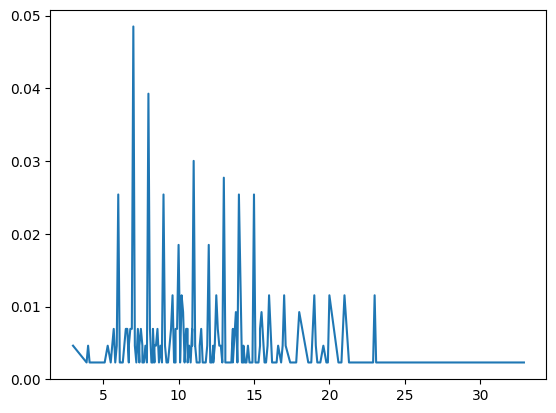

In [261]:
plt.plot(fp) #comando plot serve para criar gráficos de linhas

Text(0.5, 1.0, 'Gráfico Acumulado')

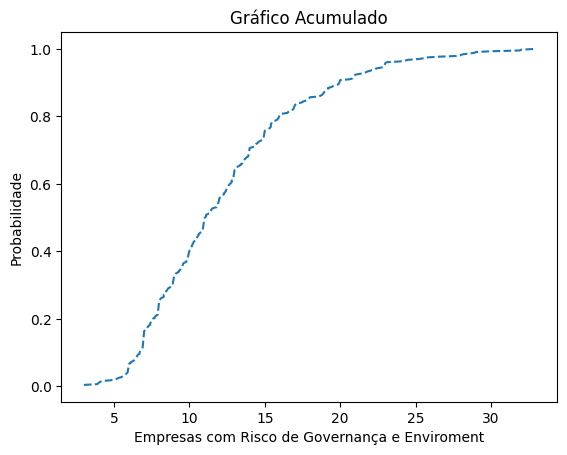

In [262]:
grafico = fp.cumsum()
plt.plot(grafico, linestyle='--') #definindo o estilo da linha como tracejada
plt.xlabel('Empresas com Risco de Governança e Enviroment')
plt.ylabel('Probabilidade')
plt.title('Gráfico Acumulado')

In [263]:
# @title Covariância

esg[['Environment_Governance', 'Total ESG Risk score']].cov()

,Environment_Governance,Total ESG Risk score
Environment_Governance,29.633192,33.898661
Total ESG Risk score,33.898661,52.772357


In [264]:
esg[['Environment_Governance', 'Controversy Score']].cov()

,Environment_Governance,Controversy Score
Environment_Governance,29.633192,0.862916
Controversy Score,0.862916,0.885008


In [265]:
# @title Correlação

esg[['Environment_Governance', 'Total ESG Risk score']].corr()

,Environment_Governance,Total ESG Risk score
Environment_Governance,1.000000,0.857216
Total ESG Risk score,0.857216,1.000000


In [266]:
esg[['Environment_Governance', 'Controversy Score']].corr()

,Environment_Governance,Controversy Score
Environment_Governance,1.000000,0.168502
Controversy Score,0.168502,1.000000


In [267]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    503 non-null    object 
 1   Sector                  501 non-null    object 
 2   Full Time Employees     496 non-null    float64
 3   Total ESG Risk score    433 non-null    float64
 4   Environment Risk Score  433 non-null    float64
 5   Governance Risk Score   433 non-null    float64
 6   Social Risk Score       433 non-null    float64
 7   Controversy Level       403 non-null    object 
 8   Controversy Score       433 non-null    float64
 9   ESG Risk Level          376 non-null    object 
 10  Environment_Governance  433 non-null    float64
dtypes: float64(7), object(4)
memory usage: 43.4+ KB


In [274]:
# @title Distribuição Normal
from sklearn.preprocessing import StandardScaler

numeric_columns = esg.select_dtypes(include=['float64'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to determine the mean and standard deviation
ajuste = scaler.fit(numeric_columns)

# Apply standard normalization (z=(value - mean)/standard deviation)
normal = scaler.transform(numeric_columns)

# Convert the standardized data to a DataFrame
normalpadrao = pd.DataFrame(normal)

# Display the first few rows of the normalized DataFrame
print(normalpadrao.head())

          0         1         2         3         4         5         6
0 -0.281271 -0.885140 -1.008472 -0.170071 -0.116826 -0.953613 -1.058032
1  0.543236  1.044280  1.185088 -0.761382  0.775707  0.110600  0.854665
2 -0.122850 -1.298587 -1.064717 -1.671091 -0.274332  0.110600 -1.720119
3  0.770065 -0.609508 -0.952227  1.149006 -0.563093  1.174812 -0.469510
4 -0.050841  0.906465 -0.858485  1.467404  2.035754  1.174812 -0.248814
